### The Drunkards Walk
A drunken farmer is standing in the middle of a field, and every second the farmer takes one step in a random direction. What is her (or his) expected distance from the origin in 1000 seconds? If she takes man steps, is she likely to wander back to the origin over and over, and end up not far from where she started? Let's write a simulation to find out.

In [58]:
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from matplotlib.colors import Normalize
import numpy as np


class Location(object):
    def __init__(self, x, y):
        """
        :param x: number
        :param y: number
        """
        self._x = x
        self._y = y

    def move(self, delta_x, delta_y):
        """
        :param delta_x: number
        :param delta_y: number
        :return: new Location after moving
        """
        return Location(self._x + delta_x, self._y + delta_y)

    def get_x(self):
        return self._x

    def get_y(self):
        return self._y

    def dist_from(self, other):
        ox, oy = other.get_x(), other.get_y()
        x_dist, y_dist = self._x - ox, self._y - oy
        return (x_dist**2 + y_dist**2) ** 0.5

    def __str__(self):
        return "<{}, {}>".format(self.get_x(), self.get_y())


class Field(object):
    def __init__(self):
        self._drunks = {}

    def add_drunk(self, drunk, loc):
        if drunk in self._drunks:
            raise ValueError('Duplicate drunk')
        self._drunks[drunk] = loc

    def move_drunk(self, drunk):
        if drunk not in self._drunks:
            raise ValueError('Drunk is not in field')
        x_dist, y_dist = drunk.take_step()
        current_location = self._drunks[drunk]
        # use move method of Location to get new location
        self._drunks[drunk] = current_location.move(x_dist, y_dist)

    def get_loc(self, drunk):
        if drunk not in self._drunks:
            raise ValueError('Drunk is not in field')
        return self._drunks[drunk]


class Drunk(object):
    def __init__(self, name=None):
        """
        :param name: string
        """
        self._name = name

    def __str__(self):
        if self._name is not None:
            return self._name
        return 'Anonymous'


class UsualDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.0, 1.0), (0.0, -1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(step_choices)

def walk(f, d, num_steps):
    """
    :param f: field
    :param d: drunk
    :param hum_steps: int >= 0
    :return: distance between the final location and the location at hte stat of the walk
    """
    start = f.get_loc(d)
    for s in range(num_steps):
        f.move_drunk(d)
    return start.dist_from(f.get_loc(d))

def sim_walks(num_steps, num_trials, d_class):
    """
    :param num_steps: int >= 0
    :param num_trials: int > 0
    :param d_class: subclass of Drunk
    :return: a list of the final distances for each trial
    """
    homer = d_class()
    origin = Location(0, 0)
    distances = []
    for t in range(num_trials):
        f = Field()
        f.add_drunk(homer, origin)
        distances.append(round(walk(f, homer, num_steps), 1))
    return distances

def drunk_test(walk_lengths, num_trials, d_class):
    """
    :param walk_lengths: sequence of ints >= y0
    :param num_trials: int >= 0
    :param d_class: a subclass of Drun
    :return: For each numbr of steps in walk_lengths, runs sim_walks with num_trials walks and prints results
    """
    averages = []
    for num_steps in walk_lengths:
        distances = sim_walks(num_steps, num_trials, d_class)
        averages.append(sum(distances) / len(distances))
        print(d_class.__name__, 'walk of', num_steps, 'steps: Mean =', '{:.3f}'.format(sum(distances)/len(distances)), 'Max =', '{:.3f}'.format(max(distances)), 'Min =', '{:.3f}'.format(min(distances)))
    return averages

def plot_avg(trials, num_steps, d_class):
    # Convert to numpy for sqrt
    np_array = np.array(num_steps)
    sqrt_steps = np.sqrt(np_array)

    # Run the simulation
    avg_steps_per_trial = drunk_test(num_steps, trials, d_class)

    # Start a fresh figure
    plt.figure()

    # Plot mean distance vs number of steps
    plt.plot(num_steps, avg_steps_per_trial, marker='o', linestyle='-', label='Mean distance')

    # Plot sqrt(steps) vs number of steps for comparison
    plt.plot(num_steps, sqrt_steps, marker='^', linestyle='--', label='sqrt(steps)')

    # Use log scale on x to spread out 10, 100, 1000, 10000 nicely
    if min(num_steps) > 0:
        plt.xscale('log')
        plt.xlabel('Number of steps (log scale)')
    else:
        plt.xlabel('Number of steps (m)')
    if min(avg_steps_per_trial) > 0:
        plt.yscale('log')
        plt.ylabel('Distance from origin (log scale)')
    else:
        plt.ylabel('Distance from origin (n)')

    plt.title('Mean Distance from Origin ({} trials)'.format(trials))
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.minorticks_on()
    plt.show()


UsualDrunk walk of 10 steps: Mean = 2.909 Max = 6.300 Min = 0.000
UsualDrunk walk of 100 steps: Mean = 8.315 Max = 23.700 Min = 0.000
UsualDrunk walk of 1000 steps: Mean = 30.721 Max = 71.400 Min = 4.000
UsualDrunk walk of 10000 steps: Mean = 97.440 Max = 232.600 Min = 5.100


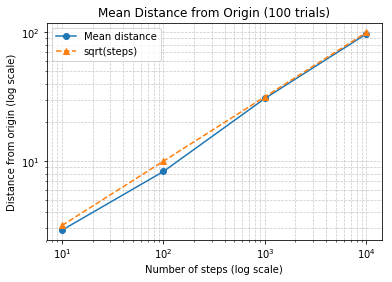

In [59]:
trials = 100
num_steps = (10, 100, 1000, 10000)

plot_avg(trials, num_steps, UsualDrunk)

UsualDrunk walk of 0 steps: Mean = 0.000 Max = 0.000 Min = 0.000
UsualDrunk walk of 1 steps: Mean = 1.000 Max = 1.000 Min = 1.000


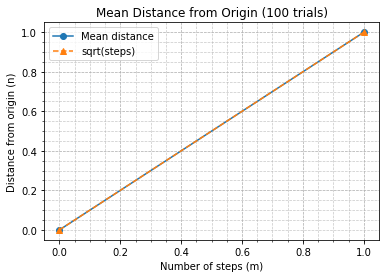

In [60]:
trials = 100
num_steps = (0, 1)

plot_avg(trials, num_steps, UsualDrunk)

In [61]:
class ColdDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.0,0.9), (0.0,-1.03), (1.03,0.0), (-1.03,0.0)]
        return random.choice(step_choices)

class EDrunk(Drunk):
    def take_step(self):
        ang = 2 * math.pi * random.random()
        length = 0.5 + 0.5 * random.random()
        return (length * math.sin(ang), length * math.cos(ang))

class PhotoDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.0, 0.5), (0.0, -0.5), (1.5, 0.0), (-1.5, 0.0)]
        return random.choice(step_choices)

class DDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.85, 0.85), (-0.85, -0.85), (-0.56, 0.56), (0.56, -0.56)]
        return random.choice(step_choices)

def sim_all(drunk_kinds, walk_lengths, num_trials):
    for d_class in drunk_kinds:
        plot_avg(num_trials, walk_lengths, d_class)

UsualDrunk walk of 100 steps: Mean = 10.110 Max = 21.600 Min = 2.800
UsualDrunk walk of 1000 steps: Mean = 25.300 Max = 34.200 Min = 10.300


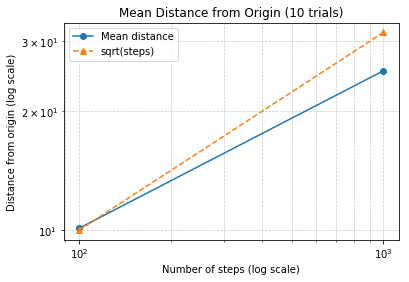

ColdDrunk walk of 100 steps: Mean = 11.540 Max = 19.200 Min = 5.000
ColdDrunk walk of 1000 steps: Mean = 40.030 Max = 74.000 Min = 11.600


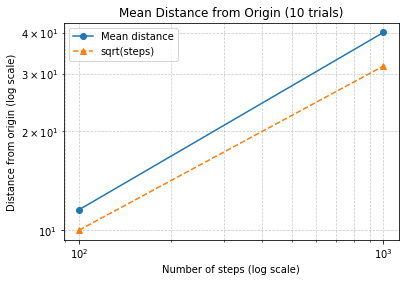

EDrunk walk of 100 steps: Mean = 8.740 Max = 17.700 Min = 1.200
EDrunk walk of 1000 steps: Mean = 23.230 Max = 43.100 Min = 7.700


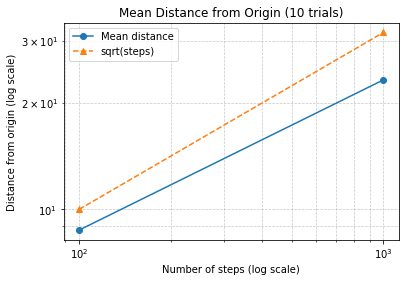

In [62]:
sim_all((UsualDrunk,ColdDrunk,EDrunk), (100, 1000), 10)

It appears that our heat seeking drunk moves away from the origin faster than the other two kinds of drunk. Lets visualize them on the same plot

In [63]:
class StyleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def next_style(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

def sim_drunk(num_trials, d_class, walk_length):
    mean_distance = []
    for steps in walk_length:
        print('Starting simulation of', steps, 'steps')
        n_trials = sim_walks(steps, num_trials, d_class)
        mean = sum(n_trials)/len(n_trials)
        mean_distance.append(mean)
    return mean_distance

def sim_all_plot(drunk_kinds, walk_lengths, num_trials):
    style_choice = StyleIterator(('m-','r:','k-.'))
    for d_class in drunk_kinds:
        cur_style = style_choice.next_style()
        print('Starting simulation of', d_class.__name__)
        means = sim_drunk(num_trials, d_class, walk_lengths)
        plt.plot(walk_lengths, means, cur_style, label=d_class.__name__)
    plt.title('Mean Distance from Origin ({} trials)'.format(num_trials))
    plt.xlabel('Number of steps (log scale)')
    plt.ylabel('Distance from origin (log scale)')
    plt.legend(loc = 'best')
    plt.semilogx()
    plt.semilogy()

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of EDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps


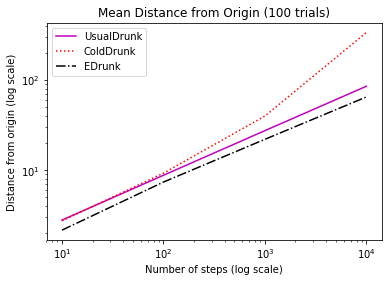

In [64]:
sim_all_plot((UsualDrunk, ColdDrunk, EDrunk), (10, 100, 1000, 10000), 100)

The usual drunk and the phototrophic drunk (EWDrunk) seem to be moving away from the origin at approximately the same pace, but the heat-seeking drunk (ColdDrunk) seems to be moving away orders of magnitude faster. This is interesting, since on average he/she is only moving 25% faster (ie takes on average, five steps for every four taken by the others.
Lets construct a different plot to help get more insight into the behavior of these three classes. Instead of plotting the distance over time for increasing number of steps, let's plot the distribution of final locations for a single number of steps.

In [65]:
def get_final_locs(num_steps, num_trials, d_class):
    locs = []
    d = d_class()
    for t in range(num_trials):
        f = Field()
        f.add_drunk(d, Location(0, 0))
        for s in range(num_steps):
            f.move_drunk(d)
        locs.append(f.get_loc(d))
    return locs

def plot_locs(drunk_kinds, num_steps, num_trials):
    # drunk_kinds = [drunk_kinds]
    style_choice = StyleIterator(('k+', 'r^', 'mo', 'gs', 'c*'))
    for d_class in drunk_kinds:
        locs = get_final_locs(num_steps, num_trials, d_class)
        x_vals, y_vals = [], []
        for loc in locs:
            x_vals.append(loc.get_x())
            y_vals.append(loc.get_y())
        mean_x = sum(x_vals)/len(x_vals)
        mean_y = sum(y_vals)/len(y_vals)
        cur_style = style_choice.next_style()
        plt.plot(x_vals, y_vals, cur_style, label='{} mean loc. = <{}, {}>'.format(d_class.__name__, mean_x, mean_y, mean_y))
        plt.title('Location at End of Walks {} steps'.format(num_steps))
        plt.xlabel('Steps East/West of Origin')
        plt.ylabel('Steps North/South of Origin')
        plt.legend(loc='best')


In [66]:
plot_locs((UsualDrunk), 100, 25)

TypeError: 'type' object is not iterable

In [ ]:
plot_locs(ColdDrunk, 100, 25)

In [ ]:
plot_locs(EDrunk, 100, 25)

In [ ]:
plot_locs(PhotoDrunk, 100, 25)

In [ ]:
plot_locs(DDrunk, 100, 200)

In [ ]:
plot_locs([EDrunk], 100, 300)

In [ ]:
plot_locs([UsualDrunk], 100, 300)

The drunks seem to be behaving as advertised. The EWDrunk ends up on the x-axis, the ColdDrunk seems to have made progress southwards, and the UsualDrunk seem to have wandered aimlessly However, there does appear to be far fewer circle markers than triangle or + markers - many of the EWDrunks footprint ended up in the same place. In additional the EWDrunks markers are uniformly spaced across the x-axis.

In [ ]:
def trace_walk(drunk_kinds, num_steps):
    style_choice = StyleIterator(('k+', 'r^', 'mo'))
    f = Field()
    for d_class in drunk_kinds:
        d = d_class()
        f.add_drunk(d, Location(0, 0))
        locs = []
        for s in range(num_steps):
            f.move_drunk(d)
            locs.append(f.get_loc(d))
        x_vals, y_vals = [], []
        for loc in locs:
            x_vals.append(loc.get_x())
            y_vals.append(loc.get_y())
        cur_style = style_choice.next_style()
        plt.plot(x_vals, y_vals, cur_style, label = d_class.__name__)
    plt.title('Spots Visited on Walk ({} steps)'.format(str(num_steps)))
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'best')



In [ ]:
trace_walk((UsualDrunk, ColdDrunk, EDrunk), 200)

This next simulation is meant to represent a game similar to _Chutes and Ladders_. Most similar to a branch of machine learning where an agent learns by interacting with an environment, receiving rewards (positive reinforcement) and penalties (negative reinforcement) to learn optimal actions.

In [ ]:
class OddField(Field):
    def __init__(self, num_holes=100, x_range=10, y_range=10):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(num_holes):
            x = random.randint(-x_range, x_range)
            y = random.randint(-y_range, y_range)
            new_x = random.randint(-x_range, x_range)
            new_y = random.randint(-y_range, y_range)
            new_loc = Location(new_x, new_y)
            self.wormholes[(x, y)] = new_loc

    def move_drunk(self, drunk):
        Field.move_drunk(self, drunk)
        x = self._drunks[drunk].get_x()
        y = self._drunks[drunk].get_y()
        if (x, y) in self.wormholes:
            self._drunks[drunk] = self.wormholes[(x, y)]
            return True #jump through wormhole
        return False    #regular step only

def trace_walk_odd_field(drunk_kinds, num_steps):
    style_choice = StyleIterator(('-', '--', '-.'))
    of = OddField()
    name_map = {
        UsualDrunk: 'UsualDrunk',
        ColdDrunk: 'ColdDrunk',
        EDrunk: 'EWDrunk',
    }


    plt.figure(figsize = (12,8))
    # ----- plot drunks and segments breaks ---
    for d_class in drunk_kinds:
        name = name_map.get(d_class, str(d_class))
        d = d_class()
        of.add_drunk(d, Location(0, 0))

        segments = []
        cur_x, cur_y = [], []

        # full chronological path for fading scatter
        all_x, all_y = [], []

        for s in range(num_steps):
            jumped = of.move_drunk(d)
            loc = of.get_loc(d)

            # record full path for fading effect
            all_x.append(loc.get_x())
            all_y.append(loc.get_y())

            # if we just teleported and we already have a segment, close it
            if jumped and cur_x:
                segments.append((cur_x, cur_y))
                cur_x, cur_y = [], []

            cur_x.append(loc.get_x())
            cur_y.append(loc.get_y())
        # add final segment
        if cur_x:
            segments.append((cur_x, cur_y))

        cur_style = style_choice.next_style()
        # 1) draw path segments (lines) for this drunk - used for legend
        for i, (x_vals, y_vals) in enumerate(segments):
            plt.plot(x_vals, y_vals, linestyle=cur_style, color='gray', alpha=0.4, linewidth=0.8, label="_nolegend_", zorder=1)
        # 2) add fading trail with scatter (no legend entry)
        if all_x:
            steps = np.arange(len(all_x))

            cmap_map = {
                UsualDrunk: cm.get_cmap('Blues'),
                ColdDrunk: cm.get_cmap('Reds'),
                EDrunk: cm.get_cmap('Greens'),
            }

            cmap = cmap_map.get(d_class, cm.get_cmap('magma'))

            norm = plt.Normalize(vmin=0, vmax=len(all_x))

            # get RGB colors from colormap
            colors = cmap(norm(steps))

            # alphas goe from very faint to solid
            alphas = np.linspace(0.5, 0.1, len(all_x))
            colors[:, 3] = alphas

            plt.scatter(
                all_x,
                all_y,
                c=colors,
                s=35,
                marker='o',
                edgecolors='none',
                zorder=3,
                label=name,
            )


    # --- build wormhole entrance & exit arrays ---
    entrance_x, entrance_y = [], []
    exit_x, exit_y = [], []
    for (x,y), new_loc in of.wormholes.items():
        entrance_x.append(x)
        entrance_y.append(y)
        exit_x.append(new_loc.get_x())
        exit_y.append(new_loc.get_y())

    # --- draw faint connection lines between entrance and exit ---
    for ex, ey, wx, wy in zip(entrance_x, entrance_y, exit_x, exit_y):
        plt.plot([ex, wx], [ey, wy], color='grey', alpha=0.3, linewidth=0.5)

    # --- plot entrance and exits once, with legend labels ---
    if entrance_x:
        plt.scatter(entrance_x, entrance_y, marker='o', color='cyan', s=30, label='wormhole entrance')
    if exit_x:
        plt.scatter(exit_x, exit_y, marker='x', color='yellow', s=80, label='wormhole exit')

    # --- labels and legend (legend outside the axes) ---
    plt.title('Spots Visited on Odd Field Walk ({} steps)'.format(str(num_steps)))
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

    # make everything fit nicely with the outside legend
    plt.tight_layout()

In [ ]:
trace_walk_odd_field((UsualDrunk, ColdDrunk, EDrunk), 200)